<a href="https://colab.research.google.com/github/stepka123/basic-NL-SA/blob/main/MNIST_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST датасет. Определение рукописного ввода цифр. Полносвязная модель на 754 первого, 254 второго и 10 третьего(выходного) слоев


In [67]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import numpy as np
import scapy as sc
from tensorflow.keras.datasets import mnist

показывает первые 25 цифр из первичного датасета

In [ ]:
#Загружаем датасет 60к изобрадений.
#1-й вектор: х -изображение цифр обучающей выборки, у - вектор соответствия который проверяется на выходе т.к обучение с учителем
#2-й вектор: х -изображение цифр тестовой выборки. у -тоже самое жля тестовой выборки
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#стандартизация входных данных, для получение значения каждого пикселя от 0 до 1(отображение )
x_train = x_train / 255
x_test = x_test / 255

plt.figure(figsize=(15, 10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [ ]:
#создается модель
model = keras.Sequential([
  Flatten(input_shape=(28, 28, 1)),#1 - байт = 1 пиксель в градации серого 28 - строк,28-столбцов это изображение
  Dense(256, activation='relu'), #создается слой из 254(можно любое кол-во) нейронов и 28*28 входных точек скрытый слой

  #создается выходной слой из 10 нейронов  т.к цифр всего 0-9 всего 10 каждому выходу свой номер, а активация будет давать й на выход
  Dense(10, activation='softmax')
])
#кол-во параметров слоя(кол-во весов) = кол-во входных связей(предыдущих нейронов(предыдущего слоя)) * кол-во нейронов текущего слоя
#т.е первый слой 28*28 - 754 + 1 биас
# второй слой это 256 нейронов, т.е 754*256+1 - 200960 параметров(связей между первым и вторым слоем) так для третьего тоже

print(model.summary())

In [61]:
#преобразуем выходные данные в вектора(наборы [1000000000] = это 0, т.к стоит в начале, от куда и начинается счет,
#да примитивно, но что поделаешь, я бы взял 4 бита из двоичной системы и смотрел по ней) по 10 значений 0-9 в виде 0 и 1, где 1 будет означать цифру
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Компиляция нс с оптимизатором и критерием категории кросс-энтропией

In [75]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#запуск процеса обучения ф-я fit
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
#x_train - входное множество,
#у_train_cat - требуемое выходное значение в виде 0 и 1,
#batch_size - размер батча (после каждого 32-ой картинки корректируются веса)
#epochs - эпохи обучения(круги),
#validation_split=0.5 - делитобучающую выборку (train) на обучающую и проверочную. Т.е 0.5 - 50% картинок из обучающей

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0018 - accuracy: 0.9890 - val_loss: 0.0039 - val_accuracy: 0.9758
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0014 - accuracy: 0.9912 - val_loss: 0.0038 - val_accuracy: 0.9760
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0013 - accuracy: 0.9922 - val_loss: 0.0041 - val_accuracy: 0.9735
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0011 - accuracy: 0.9938 - val_loss: 0.0038 - val_accuracy: 0.9764
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0011 - accuracy: 0.9933 - val_loss: 0.0034 - val_accuracy: 0.9787


In [77]:
#запускаем обучение по тестовой метрике loss - критерий качества, accuracy - процент правильно распознанных изображений
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9782


[0.003479443723335862, 0.9782000184059143]

Теперь нс обучена и расспознает цифры с вероятностью успеха в 97.8%


1/1 [==============================] - 0s 73ms/step
[[1.5009545e-09 9.9992824e-01 1.7615516e-08 3.0407910e-09 8.0741102e-06
  3.5983232e-09 2.9657457e-11 6.2901243e-05 6.8773619e-07 1.0710354e-10]]
Цифра: 1


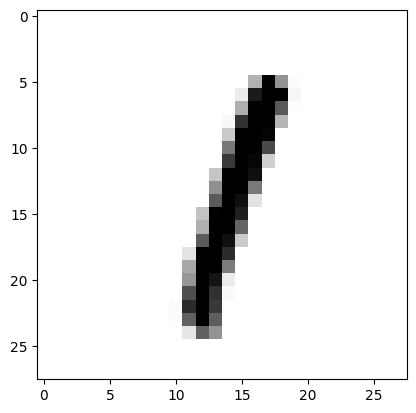

In [93]:
n = 5

x = np.expand_dims(x_test[n], axis=0)#axis - это добавляем в двумерную матрицу третье измерение, x_train[n]-двумерная матрица
#т.к передаем несколько изображений нужно подавать в виде трехмерного тензора, каждым элементом тензора будет изображение index
res = model.predict(x)
print(res)
print(f"Цифра: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()